In [1]:
import uproot
import matplotlib.pyplot as plt
import numpy as np

Step1 Getting familiar with the muon objects and nanoaod
Using uproot, we can print all the varible names store in NanoAOD using key() function. Here is an example.
Further information on the meaning of those variables can be found here.

In [2]:
file=uproot.open('~/Downloads/DYJetsToMuMu_M-50_TuneCP5_14TeV-madgraphMLM-pythia8.root')['Events']

In [44]:
file.keys()
#file.values()
#file.show()

[b'run',
 b'luminosityBlock',
 b'event',
 b'HTXS_Higgs_pt',
 b'HTXS_Higgs_y',
 b'HTXS_stage1_1_cat_pTjet25GeV',
 b'HTXS_stage1_1_cat_pTjet30GeV',
 b'HTXS_stage1_1_fine_cat_pTjet25GeV',
 b'HTXS_stage1_1_fine_cat_pTjet30GeV',
 b'HTXS_stage_0',
 b'HTXS_stage_1_pTjet25',
 b'HTXS_stage_1_pTjet30',
 b'HTXS_njets25',
 b'HTXS_njets30',
 b'btagWeight_CSVV2',
 b'btagWeight_DeepCSVB',
 b'CaloMET_phi',
 b'CaloMET_pt',
 b'CaloMET_sumEt',
 b'ChsMET_phi',
 b'ChsMET_pt',
 b'ChsMET_sumEt',
 b'nCorrT1METJet',
 b'CorrT1METJet_area',
 b'CorrT1METJet_eta',
 b'CorrT1METJet_muonSubtrFactor',
 b'CorrT1METJet_phi',
 b'CorrT1METJet_rawPt',
 b'nElectron',
 b'Electron_deltaEtaSC',
 b'Electron_dr03EcalRecHitSumEt',
 b'Electron_dr03HcalDepth1TowerSumEt',
 b'Electron_dr03TkSumPt',
 b'Electron_dr03TkSumPtHEEP',
 b'Electron_dxy',
 b'Electron_dxyErr',
 b'Electron_dz',
 b'Electron_dzErr',
 b'Electron_eInvMinusPInv',
 b'Electron_energyErr',
 b'Electron_eta',
 b'Electron_hoe',
 b'Electron_ip3d',
 b'Electron_jetPtRelv2',
 

Step2 print and plot some muon objects such as pt eta phi and apply criteria
First lets print pt eta phi of reconstructed muon

In [46]:
muon_pt,muon_eta,muon_phi=file.arrays(["Muon_pt", "Muon_eta", "Muon_phi"],outputtype=tuple)

In [30]:
print(muon_pt, muon_eta, muon_phi)

[[28.913345] [] [52.494305 40.533558 4.394153] ... [54.169434 51.1125] [50.2459 38.491104] [108.90053 52.06664 3.3444448]] [[0.38287354] [] [0.57702637 0.4537964 -0.8736572] ... [-0.49017334 -1.6101074] [-0.125 -0.770874] [0.7303467 -0.050605774 0.90319824]] [[-0.614624] [] [2.459961 -0.72839355 1.8188477] ... [-0.65563965 -2.065918] [0.7928467 -2.1796875] [1.6374512 0.67126465 -0.63830566]]


Then lets apply criteria such as pt>20 GeV and |eta|<2.4

In [47]:
masking=np.logical_and(muon_pt>20,abs(muon_eta)<2.4)

In [48]:
masking

<JaggedArray [[True] [] [True True False] ... [True True] [True True] [True True False]] at 0x7fcef0524f50>

In [49]:
print(muon_pt[masking],muon_eta[masking],muon_phi[masking])

[[28.913345] [] [52.494305 40.533558] ... [54.169434 51.1125] [50.2459 38.491104] [108.90053 52.06664]] [[0.38287354] [] [0.57702637 0.4537964] ... [-0.49017334 -1.6101074] [-0.125 -0.770874] [0.7303467 -0.050605774]] [[-0.614624] [] [2.459961 -0.72839355] ... [-0.65563965 -2.065918] [0.7928467 -2.1796875] [1.6374512 0.67126465]]


Then lets plot pt of reconstructed muon and reconstructed muon with pt>20 GeV and |eta|<2.4

In [50]:
muon_pt_masked=muon_pt[masking]
muon_pt=muon_pt.flatten()
muon_pt_masked=muon_pt_masked.flatten()
#muon_pt=np.array(muon_pt)
#muon_pt_masked=np.array(muon_pt_masked)
muon_pt

array([ 28.913345 ,  52.494305 ,  40.533558 , ..., 108.90053  ,
        52.06664  ,   3.3444448], dtype=float32)

Text(0, 0.5, 'Events')

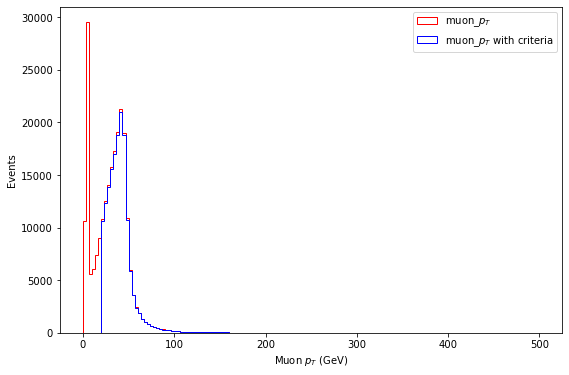

In [52]:
plt.figure(figsize=(9,6))
plt.hist(muon_pt, bins=150, range=[0,500], histtype='step', color='red', label='muon_$p_T$')
plt.hist(muon_pt_masked, bins=150, range=[0,500], histtype='step', color='blue', label='muon_$p_T$ with criteria')
plt.legend()
plt.xlabel(r'Muon $p_T$ (GeV)')
plt.ylabel('Events')

GenPart_statusFlags 
gen status flags stored bitwise, bits are: 0 : isPrompt, 1 : isDecayedLeptonHadron, 2 : isTauDecayProduct, 3 : isPromptTauDecayProduct, 4 : isDirectTauDecayProduct, 5 : isDirectPromptTauDecayProduct, 6 : isDirectHadronDecayProduct, 7 : isHardProcess, 8 : fromHardProcess, 9 : isHardProcessTauDecayProduct, 10 : isDirectHardProcessTauDecayProduct, 11 : fromHardProcessBeforeFSR, 12 : isFirstCopy, 13 : isLastCopy, 14 : isLastCopyBeforeFSR,

In [12]:
genpart_status, genpart_statusflags, genpart_pdgid, genpart_pt, genpart_eta, genpart_phi=file.arrays(["GenPart_status", "GenPart_statusFlags", "GenPart_pdgId", "GenPart_pt", "GenPart_eta", "GenPart_phi"], outputtype=tuple)
masking=np.logical_and(abs(genpart_pdgid)==13, genpart_status==1)

step 3
which is same as before.

step 4 Gen matching
Gen matching information for muon is already stored in Muon_genPartIdx, which is matched on status=1 muon using particle flow algorithm. 
Lets print the Moun_genPartIdx. Note that -1 means not matched to generated particles.


In [15]:
muon_genpartidx=file.array("Muon_genPartIdx")
muon_genpartidx

<JaggedArray [[8] [] [14 16 -1] ... [13 12] [10 8] [10 9 -1]] at 0x7fcf0827a490>

We can also do a matching ourselves using deltaR method